## Multi-Layer-Perceptron

In [8]:
import numpy as np

class MLP(object):
    # Identitätsfunktion
    def func_id(self, x):
        return x
    
    # Sigmoid Funktion
    def func_sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    # ReLU
    def func_relu(self, x):
        return np.maximum(x, 0)
    
    def __init__(self, n_input_neurons=2, n_hidden_neurons=2, n_output_neurons=1, weights=None, *args, **kwargs):
        self.n_input_neurons = n_input_neurons
        self.n_hidden_neurons = n_hidden_neurons
        self.n_output_neurons = n_output_neurons
        self.weights = weights
        W_IH = []  # Gewichte von Input -> Hidden
        W_HO = []  # Gewichte von Hidden -> Output
        self.network = []  # Daten zur Netzberechnung
        self.inputLayer = np.zeros((self.n_input_neurons + 1, 1))
        self.inputLayer[0] = 1.0  # Bias Neuron ist 1
        self.network.append(self.inputLayer)
        # Gewichte initialisieren
        if weights:
            W_IH = self.weights[0]
        else:
            W_IH = np.zeros((self.n_hidden_neurons + 1, self.n_input_neurons + 1))
        self.network.append(W_IH)
        # Hidden Layer initialisieren
        self.hiddenLayer = np.zeros((self.n_hidden_neurons + 1, 3))
        self.hiddenLayer[0] = 1.0  # Bias ist immer 1
        self.network.append(self.hiddenLayer)
        # Zweite Gewichte initialisieren
        if weights:
            W_HO = self.weights[1]
        else:
            W_HO = np.zeros((self.n_output_neurons + 1, self.n_hidden_neurons + 1))
        self.network.append(W_HO)
        # Output Layer initialisieren
        self.outputLayer = np.zeros((self.n_output_neurons + 1, 3))
        self.outputLayer[0] = 0.0
        self.network.append(self.outputLayer)
        
    def print(self):
        print("Multi-Layer-Perceptron Netzwerkansicht")
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
        for idx, nn_part in enumerate(self.network):
            print(nn_part)
            print('------------v------------')
            
    def predict(self, x):
        self.network[0][:,0] = x  # Inputwerte ins Netz eintragen
        # Hidden Layer Berechnungen
        self.network[2][1:,0] = np.dot(self.network[1][1:,:], self.network[0][:,0])  # Gewichte * Input
        self.network[2][1:,1] = self.func_sigmoid(self.network[2][1:,0])  # Aktivierungsfunktion
        self.network[2][1:,2] = self.func_id(self.network[2][1:,1])  # Outputfunktion
        # Output Layer Berechnung
        self.network[4][1:,0] = np.dot(self.network[3][1:,:], self.network[2][:,2])
        self.network[4][1:,1] = self.func_sigmoid(self.network[4][1:,0])
        self.network[4][1:,2] = np.round(self.func_id(self.network[4][1:,1]))
        return self.network[4][1:,2]

W_IH = np.matrix([[0.0, 0.0, 0.0], [-10, 20.0, 20.0], [30, -20.0, -20.0]])
W_HO = np.matrix([[0.0, 0.0, 0.0], [-30, 20.0, 20.0]])
weights = []
weights.append(W_IH)
weights.append(W_HO)

nn = MLP(weights=weights)
nn.print()
X = np.array([[1.0, 1.0, 1.0], [1.0, 0, 1.0], [1.0, 1.0, 0], [1.0, 0, 0]])
y = np.array([0, 1.0, 1.0, 0])

print("Predict: ")
for idx, x in enumerate(X):
    print('{} {} -> {}'.format(x, y[idx], nn.predict(x)))

Multi-Layer-Perceptron Netzwerkansicht
[[1.000]
 [0.000]
 [0.000]]
------------v------------
[[0.000 0.000 0.000]
 [-10.000 20.000 20.000]
 [30.000 -20.000 -20.000]]
------------v------------
[[1.000 1.000 1.000]
 [0.000 0.000 0.000]
 [0.000 0.000 0.000]]
------------v------------
[[0.000 0.000 0.000]
 [-30.000 20.000 20.000]]
------------v------------
[[0.000 0.000 0.000]
 [0.000 0.000 0.000]]
------------v------------
Predict: 
[1.000 1.000 1.000] 0.0 -> [0.000]
[1.000 0.000 1.000] 1.0 -> [1.000]
[1.000 1.000 0.000] 1.0 -> [1.000]
[1.000 0.000 0.000] 0.0 -> [0.000]


## Gradientenabstieg

Input x = 0.200000, Gewünschter Output y = 0.20
Iter	x	w	net i	a	y_hat	y	E	E'	w delta
0	0.2	-10.00	-2.00	0.12	0.12	0.20	0.00	-0.01	0.01
10	0.2	-9.92	-1.98	0.12	0.12	0.20	0.00	-0.01	0.01
20	0.2	-9.83	-1.97	0.12	0.12	0.20	0.00	-0.01	0.01
30	0.2	-9.75	-1.95	0.12	0.12	0.20	0.00	-0.01	0.01
40	0.2	-9.67	-1.93	0.13	0.13	0.20	0.00	-0.01	0.01
50	0.2	-9.59	-1.92	0.13	0.13	0.20	0.00	-0.01	0.01
60	0.2	-9.51	-1.90	0.13	0.13	0.20	0.00	-0.01	0.01
70	0.2	-9.43	-1.89	0.13	0.13	0.20	0.00	-0.01	0.01
80	0.2	-9.35	-1.87	0.13	0.13	0.20	0.00	-0.01	0.01
90	0.2	-9.27	-1.85	0.14	0.14	0.20	0.00	-0.01	0.01
100	0.2	-9.20	-1.84	0.14	0.14	0.20	0.00	-0.01	0.01
110	0.2	-9.13	-1.83	0.14	0.14	0.20	0.00	-0.01	0.01
120	0.2	-9.05	-1.81	0.14	0.14	0.20	0.00	-0.01	0.01
130	0.2	-8.98	-1.80	0.14	0.14	0.20	0.00	-0.01	0.01
140	0.2	-8.91	-1.78	0.14	0.14	0.20	0.00	-0.01	0.01
150	0.2	-8.84	-1.77	0.15	0.15	0.20	0.00	-0.01	0.01
160	0.2	-8.78	-1.76	0.15	0.15	0.20	0.00	-0.01	0.01
170	0.2	-8.71	-1.74	0.15	0.15	0.20	0.00	-0.01	0.01
180	0.

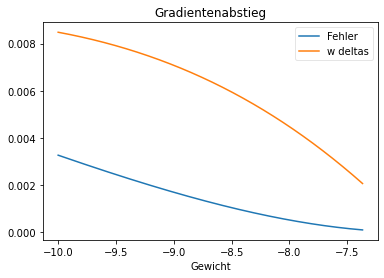

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def func_id(x):
    return x

def func_sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Initialisierung
x = 0.2
y = x
# Startgewicht
weight = -10
# Lernrate
my = 1.0
# Für die Visualisierung
weights = []
errors = []
w_deltas = []

print ("Input x = {:.6f}, Gewünschter Output y = {:.2f}".format(x, y))

print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format('Iter', 'x', 'w', 'net i', 'a', 'y_hat', 'y', 'E', "E'", 'w delta'))

for step in range(500):
    net_i = weight * x  # Net Input berechnen
    activation = func_sigmoid(net_i)  # Aktivierung über identitätsfunktion
    y_hat = activation  # Output errechnen
    error = 0.5 * (y - y_hat)**2. # Quadratischer Fehler: gewünschter - errechneter Output
    # derivative = (-1.0) * x * (y - y_hat)  # Gradient für Identitätsfunktion
    derivative = (-1.0) * activation * (1.0 - activation) * (y - y_hat)  # Gradient für Sigmoid Funktion
    w_delta = (-1) * derivative * my  # Gewichtveränderung berechnen
    # Visualisierungsdaten speichern
    weights.append(weight)
    errors.append(error)
    w_deltas.append(w_delta)
    if step % 10 == 0:
        print("{}\t{}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(step, x, weight, net_i, activation, y_hat, y, error, derivative, w_delta))
    # Neues Gewicht
    weight += w_delta

fig, ax1 = plt.subplots()
ax1.plot(weights, errors, label="Fehler")
ax1.plot(weights, w_deltas, label="w deltas")
ax1.set_title('Gradientenabstieg')
legende = ax1.legend(loc='best', fancybox=True, framealpha=0.5)
plt.xlabel('Gewicht')
plt.show()

## Backpropagation
- Wie oben, nur besser

Multi-Layer-Perceptron Netzwerkansicht
[[1.000 1.000 1.000 1.000 1.000]
 [0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000]]
------------v------------
[[6.689 -5.357 -6.431]
 [2.013 -5.511 -5.506]
 [-6.315 4.054 4.053]]
------------v------------
[[1.000 1.000 1.000 1.000 -0.008]
 [2.013 0.882 0.882 0.104 0.002]
 [-6.315 0.002 0.002 0.002 0.000]]
------------v------------
[[0.416 -0.959 0.940]
 [3.832 -7.770 -7.832]]
------------v------------
[[0.000 0.000 0.000 0.000 0.000]
 [-3.036 0.046 0.046 0.044 -0.002]]
------------v------------
Predict: 
[1.000 1.000 1.000] 0.0 -> [0.053]
[1.000 0.000 1.000] 1.0 -> [0.946]
[1.000 1.000 0.000] 1.0 -> [0.946]
[1.000 0.000 0.000] 0.0 -> [0.046]


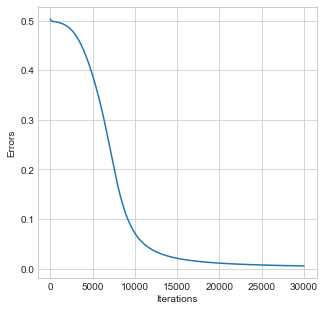

In [4]:
import numpy as np
from sklearn.utils.validation import check_random_state
import matplotlib.pyplot as plt
%matplotlib inline

class MLP(object):
    # Identitätsfunktion
    def func_id(self, x):
        return x
    
    # Sigmoid Funktion
    def func_sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    # ReLU
    def func_relu(self, x):
        return np.maximum(x, 0)
    
    def __init__(self, n_input_neurons=2, n_hidden_neurons=2, n_output_neurons=1, weights=None, eta=0.01, n_iterations=1000, random_state=41, *args, **kwargs):
        self.n_input_neurons = n_input_neurons
        self.n_hidden_neurons = n_hidden_neurons
        self.n_output_neurons = n_output_neurons
        self.weights = weights
        self.eta = eta
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.random_state_ = check_random_state(self.random_state)  # Initialisieren des Zufallsgenerators
        self.errors = []  # Fehlerlog
        W_IH = []  # Gewichte von Input -> Hidden
        W_HO = []  # Gewichte von Hidden -> Output
        self.network = []  # Daten zur Netzberechnung
        self.inputLayer = np.zeros((self.n_input_neurons + 1, 5))
        self.inputLayer[0] = 1.0  # Bias Neuron ist 1
        self.network.append(self.inputLayer)
        # Gewichte initialisieren
        if weights:
            W_IH = self.weights[0]
        else:
            W_IH = 2 * self.random_state_.random_sample((self.n_hidden_neurons + 1, self.n_input_neurons + 1)) - 1
        self.network.append(W_IH)
        # Hidden Layer initialisieren
        self.hiddenLayer = np.zeros((self.n_hidden_neurons + 1, 5))
        self.hiddenLayer[0] = 1.0  # Bias ist immer 1
        self.network.append(self.hiddenLayer)
        # Zweite Gewichte initialisieren
        if weights:
            W_HO = self.weights[1]
        else:
            W_HO = 2 * self.random_state_.random_sample((self.n_output_neurons + 1, self.n_hidden_neurons + 1)) - 1
        self.network.append(W_HO)
        # Output Layer initialisieren
        self.outputLayer = np.zeros((self.n_output_neurons + 1, 5))
        self.outputLayer[0] = 0.0
        self.network.append(self.outputLayer)
        
    def print(self):
        print("Multi-Layer-Perceptron Netzwerkansicht")
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
        for idx, nn_part in enumerate(self.network):
            print(nn_part)
            print('------------v------------')
            
    def predict(self, x):
        self.network[0][:,2] = x  # Inputwerte ins Netz eintragen
        # Hidden Layer Berechnungen
        self.network[2][1:,0] = np.dot(self.network[1][1:,:], self.network[0][:,2])  # Gewichte * Input
        self.network[2][1:,1] = self.func_sigmoid(self.network[2][1:,0])  # Aktivierungsfunktion
        self.network[2][1:,2] = self.func_id(self.network[2][1:,1])  # Outputfunktion
        self.network[2][1:,3] = self.network[2][1:,2] * (1.0 - self.network[2][1:,2])
        # Output Layer Berechnung
        self.network[4][1:,0] = np.dot(self.network[3][1:,:], self.network[2][:,2])
        self.network[4][1:,1] = self.func_sigmoid(self.network[4][1:,0])
        self.network[4][1:,2] = self.func_id(self.network[4][1:,1])
        self.network[4][1:,3] = self.network[4][1:,2] * (1.0 - self.network[4][1:,2])
        return self.network[4][:,2]

    def fit(self, X, Y):
        delta_w_jk = []
        delta_w_ij = []
        self.errors = []
        for iteration in range(self.n_iterations):
            error = 0.0
            for x, y in zip(X, Y):
                # Prediction und Fehlerberechngung
                y_hat = self.predict(x)
                diff = y - y_hat
                error += 0.5 * np.sum(diff * diff)
                # delta_k der Output Schicht
                self.network[4][:,4] = self.network[4][:,3] * diff
                # delta j der Hidden Schicht
                self.network[2][:,4] = self.network[2][:,3] * np.dot(self.network[3][:].T, self.network[4][:,4])
                # Gewichtsänderungen berechnen
                delta_w_jk = self.eta * np.outer(self.network[4][:,4], self.network[2][:,2].T)
                delta_w_ij = self.eta * np.outer(self.network[2][:,4], self.network[0][:,2].T)
                # Gewichte ändern
                self.network[1][:,:] += delta_w_ij
                self.network[3][:,:] += delta_w_jk
            self.errors.append(error)

    def plot(self):
        plt.figure(1, figsize=(5, 5))
        plt.plot(self.errors)
        plt.style.use('seaborn-whitegrid')
        plt.xlabel('Iterations')
        plt.ylabel('Errors')

X = np.array([[1.0, 1.0, 1.0], [1.0, 0, 1.0], [1.0, 1.0, 0], [1.0, 0, 0]])
Y = np.array([[0.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 0.0]])

nn = MLP(eta=0.03, n_iterations=30000, random_state=42)
nn.fit(X, Y)

nn.print()

nn.plot()

print('Predict: ')
for x, y in zip(X, Y):
    print('{} {} -> {}'.format(x, y[1], nn.predict(x)[1:2]))